In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch                 # for dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [2]:
Crime=pd.read_csv("crime_data.csv")
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
Crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Hierarchical Clustering

In [4]:
norm = MinMaxScaler()                                 #Normalization function 
Crime_normal=norm.fit_transform(Crime.iloc[:,1:])        #Normalizing the data
Crime_normal

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

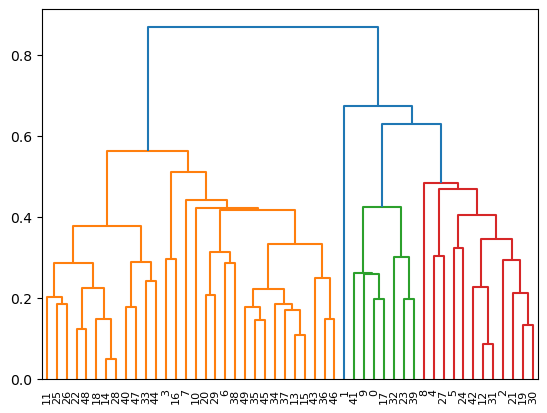

In [5]:
dendrogram = sch.dendrogram(sch.linkage(Crime_normal,method='average'))

In [6]:
# create clusters
hc = AgglomerativeClustering(n_clusters=2, metric = 'euclidean',distance_threshold=None)

In [7]:
# save clusters for chart
y_hc = hc.fit_predict(Crime_normal)
y_hc

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
set(y_hc)            #gives unique values

{0, 1}

In [9]:
Crime['Hierarchical cluster'] = y_hc
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [10]:
Crime.sort_values("Hierarchical cluster")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical cluster
49,Wyoming,6.8,161,60,15.6,0
35,Oklahoma,6.6,151,68,20.0,0
29,New Jersey,7.4,159,89,18.8,0
28,New Hampshire,2.1,57,56,9.5,0
36,Oregon,4.9,159,67,29.3,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
37,Pennsylvania,6.3,106,72,14.9,0
22,Minnesota,2.7,72,66,14.9,0


In [11]:
Crime.iloc[:,1:].groupby("Hierarchical cluster").mean(numeric_only=True)

,Murder,Assault,UrbanPop,Rape
Hierarchical cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


# Analysis

In [12]:
# Cluster1 has highest murder rate in different places of United States
# Cluster1 has highest Assualt rate in different places of United States
# Cluster1 has highest urban population in different places of United States
# Cluster1 has highest Rape rate in different places of United States

# K-means Clustering

In [13]:
# Standardisation function            #Standardization = x-mean/sd,             Normalization = x-xmin/xmax-xmin 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Crime_df = pd.DataFrame(scaler.fit_transform(Crime.iloc[:,1:-1]),columns = ['Murder', 'Assault', 'Urbanpop', 'Rape']) 
scaled_Crime_df

,Murder,Assault,Urbanpop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [14]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\pirfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pirfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pirfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pirfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

[200.0, 104.9616331575687, 83.25845759512646, 57.67285241283121, 51.58077513078224, 45.87909041715906, 41.65663356144606, 37.67852016966528, 33.3823091339961]


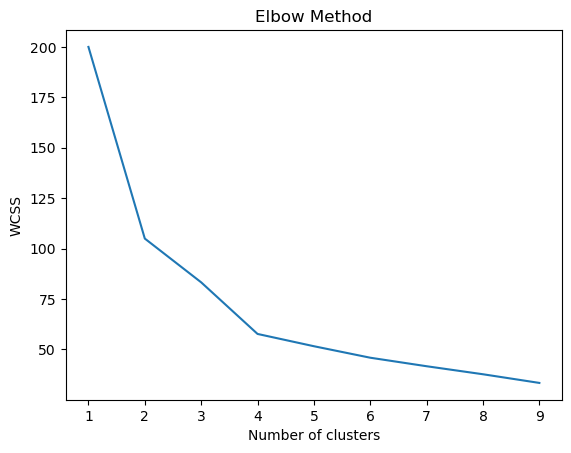

In [15]:
wcss = []
for i in range(1, 10):        #clusters 1 to 10 compute (wcss)within cluster sum of squre
    
    kmeans = KMeans(n_clusters=i,n_init='auto',random_state=42 )
    kmeans.fit(scaled_Crime_df)
    #kmeans.fit(Univ1)
    wcss.append(kmeans.inertia_)
print(wcss)    
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(2, random_state=10)             #from graph 2 as after that clustering is slightly decreasing
clusters_new.fit(scaled_Crime_df)

C:\Users\pirfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pirfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=10)

In [17]:
set(clusters_new.labels_)                         #gives unique values

{0, 1}

In [18]:
#Assign clusters to the data set
Crime['Kmean cluster'] = clusters_new.labels_
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical cluster,Kmean cluster
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


In [19]:
Crime.sort_values(by = "Kmean cluster")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical cluster,Kmean cluster
49,Wyoming,6.8,161,60,15.6,0,0
35,Oklahoma,6.6,151,68,20.0,0,0
29,New Jersey,7.4,159,89,18.8,0,0
28,New Hampshire,2.1,57,56,9.5,0,0
36,Oregon,4.9,159,67,29.3,0,0
26,Nebraska,4.3,102,62,16.5,0,0
25,Montana,6.0,109,53,16.4,0,0
48,Wisconsin,2.6,53,66,10.8,0,0
37,Pennsylvania,6.3,106,72,14.9,0,0
22,Minnesota,2.7,72,66,14.9,0,0


In [20]:
Crime.iloc[:,1:].groupby('Kmean cluster').mean(numeric_only=True)

,Murder,Assault,UrbanPop,Rape,Hierarchical cluster
Kmean cluster,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


In [21]:
# Quality of clusters is expressed in terms of Silhoutte score

from sklearn.metrics import silhouette_score
score =silhouette_score(scaled_Crime_df, clusters_new.labels_ , metric='euclidean')
score    #It should be in between -1 to +1

0.4084890326217641

# Analysis

In [22]:
# Cluster1 has highest murder rate in different places of United States
# Cluster1 has highest Assualt rate in different places of United States
# Cluster1 has highest urban population in different places of United States
# Cluster1 has highest Rape rate in different places of United States

# DBSCAN

In [23]:
# Standardisation function            #Standardization = x-mean/sd,             Normalization = x-xmin/xmax-xmin 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Crime.iloc[:,1:-2]),columns = ['Murder', 'Assualt', 'Urbanpop', 'Rape']) 
X
#scaled_Airlines_df

,Murder,Assualt,Urbanpop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


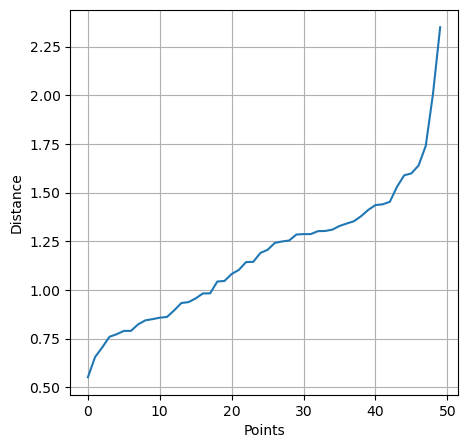

In [24]:
#Knee plot it gives epsolon (E) 
#we cant specify no.of cluster in dbscan  
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)    #specifying to take 11 neighbors @Own
neighbors = nearest_neighbors.fit(X)                    #we get 4 neighbor distances & indices

distances, indices = neighbors.kneighbors(X)
# print(distances)
# print(indices)
# print(distances.shape)
distances = np.sort(distances[:,4], axis=0)           #sorting distance then taking val i.e largest distance
#print(distances)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

1.530051650198102


<Figure size 500x500 with 0 Axes>

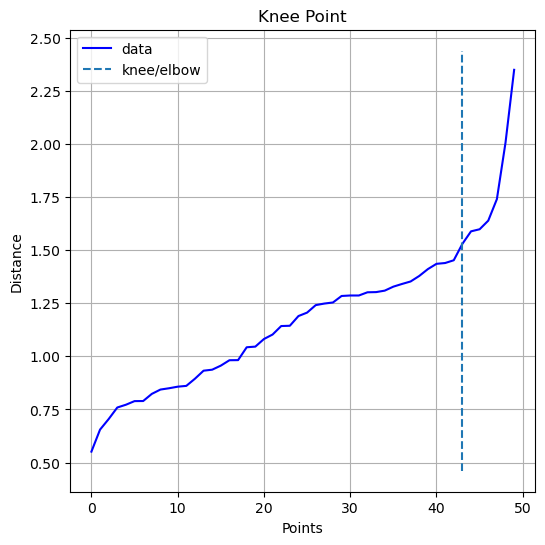

In [25]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

print(distances[knee.knee])

In [26]:
dbscan = DBSCAN(eps=1.5, min_samples=3)     #1.5 from above graph 
clusters = dbscan.fit_predict(X)

In [27]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [28]:
set(clusters)      #gives uniqure clusters , -1 are noise points

{-1, 0}

In [29]:
Crime['DBSCAN']=dbscan.labels_         #now adding cluster clmn with predicted
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical cluster,Kmean cluster,DBSCAN
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,0,0,0
4,California,9.0,276,91,40.6,1,1,0
5,Colorado,7.9,204,78,38.7,1,1,0
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,0,0,0
8,Florida,15.4,335,80,31.9,1,1,0
9,Georgia,17.4,211,60,25.8,1,1,0


In [30]:
# Use pandas filtering and get noisy datapoints -1
Crime[Crime['DBSCAN']==-1]
#Noise are not Directly density reachable,density reachable,density connected

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical cluster,Kmean cluster,DBSCAN
1,Alaska,10.0,263,48,44.5,1,1,-1


# Silhouette Score

In [31]:
#it shld be in -1 to +1
from sklearn.metrics import silhouette_score
score =silhouette_score(X, dbscan.labels_ , metric='euclidean')
score 

0.23455598753159795